<a href="https://colab.research.google.com/github/rajaganesh1357/Time_Series_Repository/blob/main/Prophet_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Prophet

In [2]:
from prophet import Prophet

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
df = df[['Date','Total Volume','type','region']]
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.head()

<ipython-input-19-bc33333e926e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')


,Date,Total Volume,type,region
0,2015-12-27,64236.62,conventional,Albany
1,2015-12-20,54876.98,conventional,Albany
2,2015-12-13,118220.22,conventional,Albany
3,2015-12-06,78992.15,conventional,Albany
4,2015-11-29,51039.60,conventional,Albany


In [50]:
df.sort_values(by='Date', ascending=True, inplace=True)

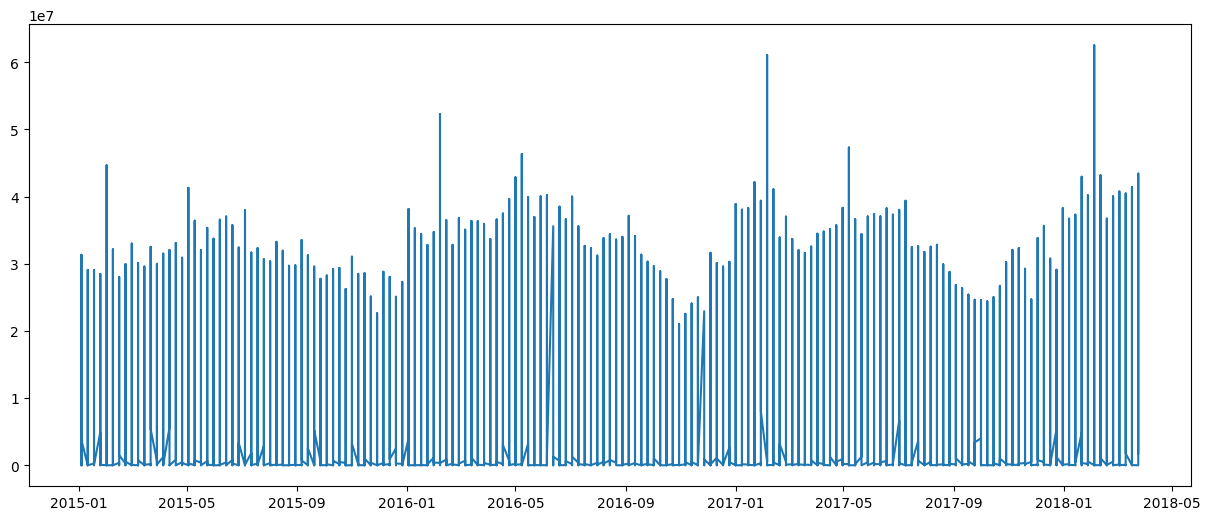

In [51]:
plt.figure(figsize=(15,6))
plt.plot(df['Date'],df['Total Volume'])
plt.show()

In [21]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [22]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [52]:
data = df[(df['region'] == 'TotalUS') &
               (df['type'] == 'organic')][['Date', 'Total Volume']]
data.head()

,Date,Total Volume
11829,2015-01-04,612910.15
11828,2015-01-11,669528.88
11827,2015-01-18,713120.00
11826,2015-01-25,556368.86
11825,2015-02-01,740896.97


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 11829 to 18213
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   Total Volume  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


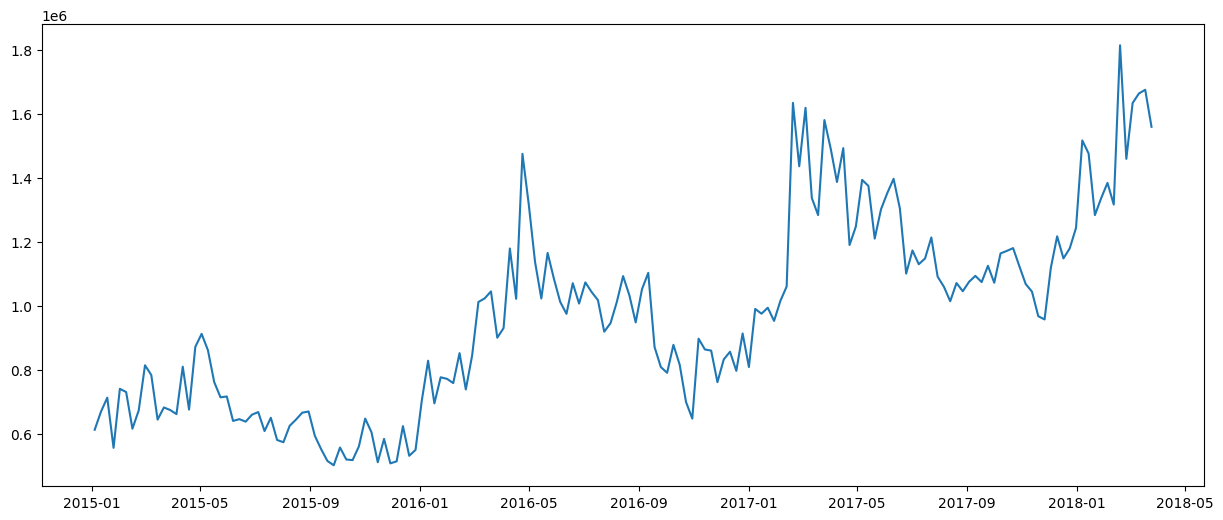

In [54]:
plt.figure(figsize=(15,6))
plt.plot(data['Date'],data['Total Volume'])
plt.show()

In [64]:
sd_data = data.copy()
sd_data = sd_data[['Date','Total Volume']]
sd_data = sd_data.set_index("Date")

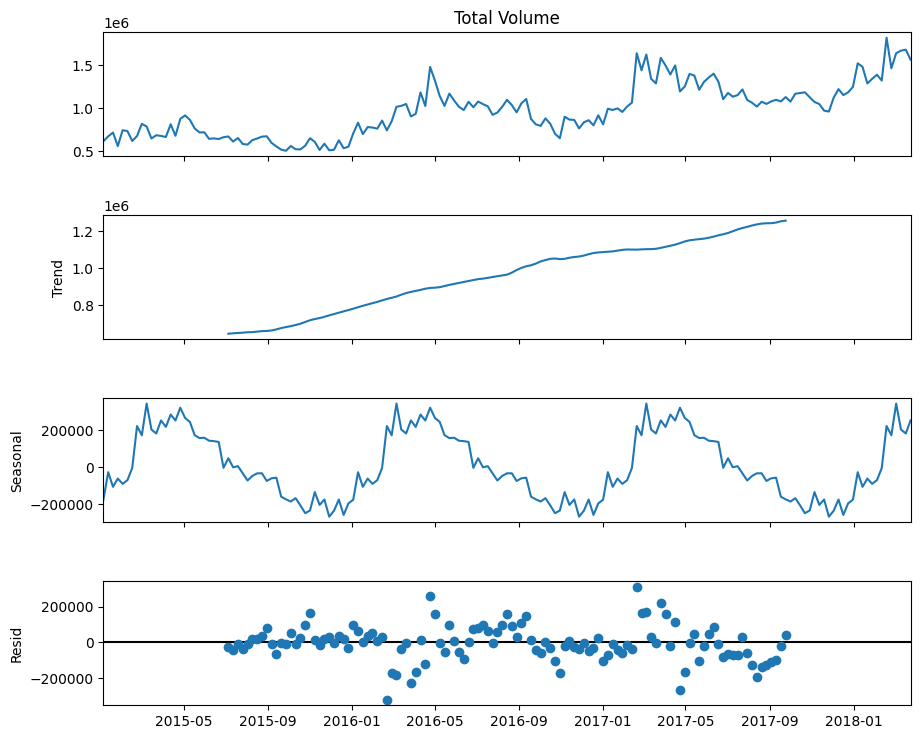

In [66]:
data_sd = seasonal_decompose(sd_data['Total Volume'])
fig = data_sd.plot()
fig.set_size_inches(10,8)

In [55]:
data['month'] = data['Date'].dt.month

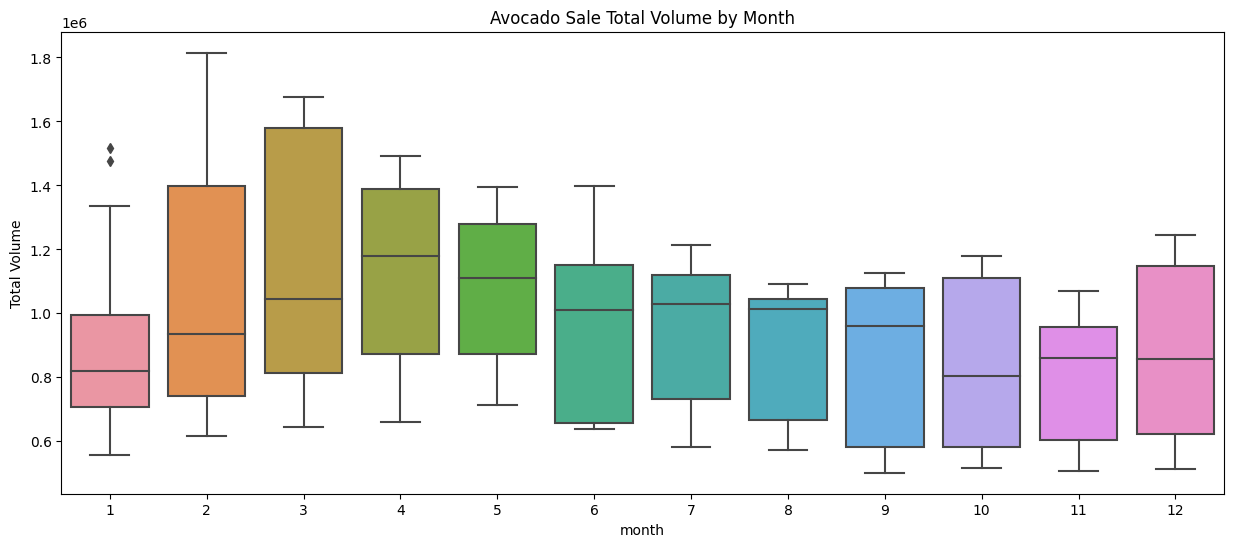

In [56]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=data['month'], y=data['Total Volume'])
plt.title('Avocado Sale Total Volume by Month')
plt.show()

In [69]:
data = data.rename(columns={'Date':'ds',"Total Volume":'y'})

In [74]:
train,test = train_test_split(data,test_size=0.20,random_state=123,shuffle=False)

In [75]:
model = Prophet(interval_width=0.95,yearly_seasonality = True)
model.fit(data)
future = model.make_future_dataframe(len(test), freq='W')
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt4x1eds/uhp1otg_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt4x1eds/ld7g7fpd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77322', 'data', 'file=/tmp/tmpzt4x1eds/uhp1otg_.json', 'init=/tmp/tmpzt4x1eds/ld7g7fpd.json', 'output', 'file=/tmp/tmpzt4x1eds/prophet_modelazqso2nm/prophet_model-20230908175615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


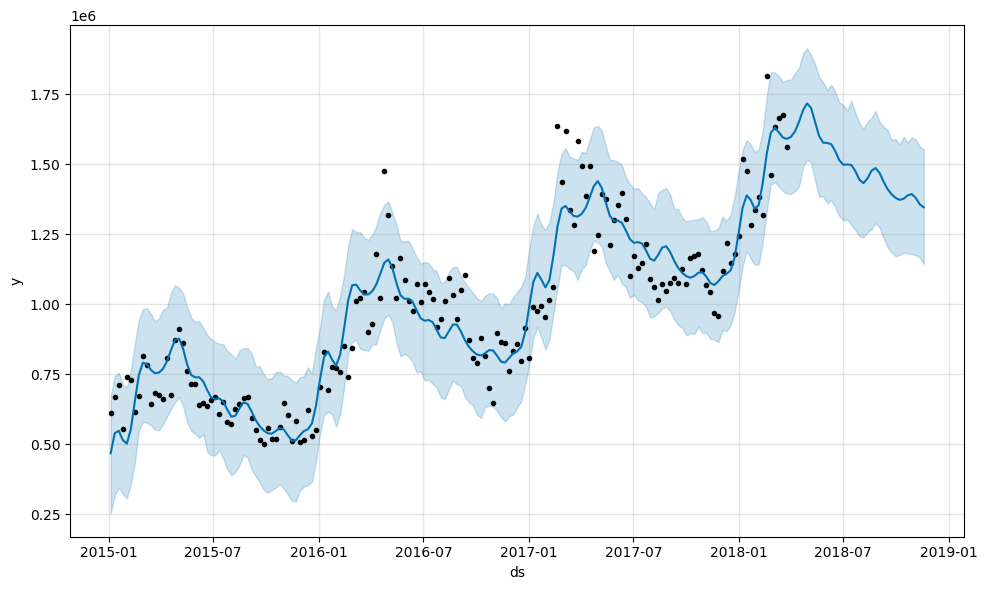

In [76]:
fig1 = model.plot(forecast)

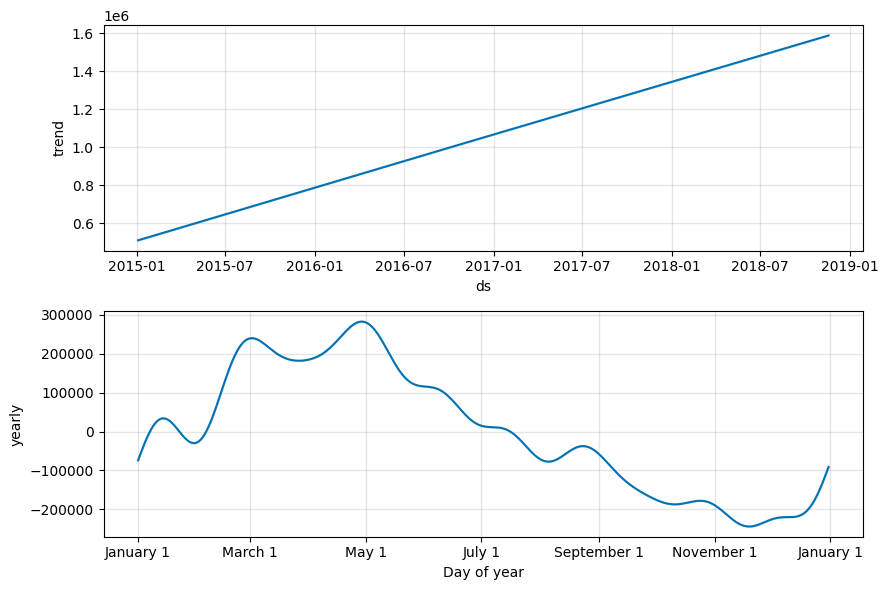

In [77]:
fig2 = model.plot_components(forecast)

In [79]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation( model = model, initial = '731 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2017-03-25 00:00:00 and 2017-03-25 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt4x1eds/ak17bs4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt4x1eds/sjup6ql9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21055', 'data', 'file=/tmp/tmpzt4x1eds/ak17bs4l.json', 'init=/tmp/tmpzt4x1eds/sjup6ql9.json', 'output', 'file=/tmp/tmpzt4x1eds/prophet_model1frn_n5e/prophet_model-20230908175922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:59:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:59:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
from prophet.diagnostics import performance_metrics
data_metrics = performance_metrics(cv_results)
data_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,5.865209e+10,242181.942630,210340.786600,0.149813,0.167615,0.152506,0.4
1,36 days,4.973745e+10,223018.941134,196039.928169,0.150079,0.167615,0.142946,0.4
2,43 days,3.867720e+10,196665.200831,163051.821372,0.128774,0.061092,0.118213,0.6
3,50 days,3.796039e+10,194834.256790,156199.144307,0.123881,0.061092,0.112998,0.6
4,57 days,4.109948e+10,202730.061232,171157.714862,0.138350,0.117567,0.125952,0.6
5,64 days,2.102328e+10,144994.067978,110768.089860,0.087402,0.061092,0.081256,0.8
6,71 days,6.473168e+09,80456.003087,67221.367446,0.051792,0.043014,0.050235,1.0
7,78 days,7.876690e+09,88750.721022,74080.097084,0.056671,0.043014,0.056240,1.0
8,85 days,7.838111e+09,88533.105187,73508.388377,0.056509,0.043014,0.056205,1.0
9,92 days,1.033508e+10,101661.613597,81232.590358,0.065864,0.043014,0.064370,1.0
